<a href="https://colab.research.google.com/github/Udhay2898/Real-Fake-Job-Posting-Prediction/blob/Master/Food_and_Beverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
df1 = pd.read_csv('/content/drive/MyDrive/Data Sets/Analysis of Food and Beverage Industry Survey Data/fact_survey_responses.csv')
df1.sample(3)

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
8387,111388,128418,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Healthy,Yes,4,...,Reduced sugar content,Caffeine,Yes,Yes,Online ads,Other,Yes,Above 150,Online retailers,Studying/working late
6070,109071,126101,2-3 times a week,Throughout the day,Increased energy and focus,No,Neutral,Effective,No,2,...,More natural ingredients,Vitamins,Yes,Yes,Online ads,Innovative bottle design,No,100-150,Supermarkets,Sports/exercise
8965,111966,128996,Rarely,Throughout the day,To combat fatigue,Yes,Neutral,Effective,Yes,4,...,Healthier alternatives,Sugar,Yes,Yes,Online ads,Innovative bottle design,No,100-150,Supermarkets,Driving/commuting


In [13]:
df2 = pd.read_csv('/content/drive/MyDrive/Data Sets/Analysis of Food and Beverage Industry Survey Data/dim_repondents.csv')
df2.sample(3)

,Respondent_ID,Name,Age,Gender,City_ID
8391,128422,Anahita Goyal,65+,Male,CT115
3141,123172,Zara Dua,15-18,Male,CT114
6590,126621,Heer Chaudhari,31-45,Male,CT112


In [14]:
df3 = pd.read_csv('/content/drive/MyDrive/Data Sets/Analysis of Food and Beverage Industry Survey Data/dim_cities.csv')
df3.sample(3)

,City_ID,City,Tier
2,CT113,Bangalore,Tier 1
8,CT119,Jaipur,Tier 2
9,CT120,Lucknow,Tier 2


In [17]:
merged_df = pd.merge(df2, df3, on='City_ID')

merged_df.sample(10)

,Respondent_ID,Name,Age,Gender,City_ID,City,Tier
1026,125980,Charvi Dass,46-65,Female,CT118,Pune,Tier 2
1666,121655,Jivin Tara,19-30,Male,CT116,Hyderabad,Tier 1
4402,124358,Diya Sekhon,31-45,Female,CT113,Bangalore,Tier 1
7554,129087,Yashvi Goel,19-30,Male,CT112,Mumbai,Tier 1
8473,128218,Tiya Batta,19-30,Male,CT114,Chennai,Tier 1
2019,123533,Nirvi Chaudhuri,19-30,Male,CT116,Hyderabad,Tier 1
4448,124531,Sara Kashyap,19-30,Female,CT113,Bangalore,Tier 1
859,124264,Priyansh Jayaraman,15-18,Male,CT118,Pune,Tier 2
3410,120761,Misha Sangha,19-30,Male,CT113,Bangalore,Tier 1
7667,129786,Lagan Bath,31-45,Male,CT112,Mumbai,Tier 1


In [21]:
df = pd.merge(merged_df,df1,on = 'Respondent_ID')

df.sample(1)

,Respondent_ID,Name,Age,Gender,City_ID,City,Tier,Response_ID,Consume_frequency,Consume_time,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
4584,125012,Miraan Kannan,31-45,Male,CT113,Bangalore,Tier 1,107982,Daily,Before exercise,...,Reduced sugar content,Caffeine,Yes,No,Outdoor billboards,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late


In [22]:
# Exploring Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Respondent_ID                   10000 non-null  int64 
 1   Name                            10000 non-null  object
 2   Age                             10000 non-null  object
 3   Gender                          10000 non-null  object
 4   City_ID                         10000 non-null  object
 5   City                            10000 non-null  object
 6   Tier                            10000 non-null  object
 7   Response_ID                     10000 non-null  int64 
 8   Consume_frequency               10000 non-null  object
 9   Consume_time                    10000 non-null  object
 10  Consume_reason                  10000 non-null  object
 11  Heard_before                    10000 non-null  object
 12  Brand_perception                10000 non-null 

In [23]:
df.columns

Index(['Respondent_ID', 'Name', 'Age', 'Gender', 'City_ID', 'City', 'Tier',
       'Response_ID', 'Consume_frequency', 'Consume_time', 'Consume_reason',
       'Heard_before', 'Brand_perception', 'General_perception',
       'Tried_before', 'Taste_experience', 'Reasons_preventing_trying',
       'Current_brands', 'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations'],
      dtype='object')

In [25]:
# Assuming df is your DataFrame
columns_order = [
    'Respondent_ID', 'Name', 'Age', 'Gender', 'City_ID', 'City', 'Tier',
    'Response_ID', 'Consume_frequency', 'Consume_time', 'Consume_reason',
    'Heard_before', 'Tried_before', 'Taste_experience', 'Reasons_preventing_trying',
    'Current_brands', 'Reasons_for_choosing_brands', 'Brand_perception', 'General_perception',
    'Improvements_desired', 'Ingredients_expected', 'Health_concerns',
    'Interest_in_natural_or_organic', 'Marketing_channels', 'Packaging_preference',
    'Limited_edition_packaging', 'Price_range', 'Purchase_location', 'Typical_consumption_situations'
]

# Reordering the DataFrame columns
df = df[columns_order]

df.sample(2)

,Respondent_ID,Name,Age,Gender,City_ID,City,Tier,Response_ID,Consume_frequency,Consume_time,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
3715,121897,Riya Iyer,31-45,Female,CT113,Bangalore,Tier 1,104867,2-3 times a month,To stay awake during work/study,...,Wider range of flavors,Sugar,Yes,No,Outdoor billboards,Eco-friendly design,No,Above 150,Gyms and fitness centers,Sports/exercise
8475,128221,Myra Barman,19-30,Non-binary,CT114,Chennai,Tier 1,111191,2-3 times a month,Before exercise,...,More natural ingredients,Vitamins,No,Not Sure,Online ads,Innovative bottle design,Yes,Below 50,Online retailers,Social outings/parties


In [27]:
df.columns

Index(['Name', 'Age', 'Gender', 'City', 'Tier', 'Consume_frequency',
       'Consume_time', 'Consume_reason', 'Heard_before', 'Tried_before',
       'Taste_experience', 'Reasons_preventing_trying', 'Current_brands',
       'Reasons_for_choosing_brands', 'Brand_perception', 'General_perception',
       'Improvements_desired', 'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations'],
      dtype='object')

In [26]:
# Drop the 'job_id' column
df = df.drop(columns=['Respondent_ID', 'City_ID', 'Response_ID'])

df.sample(2)

,Name,Age,Gender,City,Tier,Consume_frequency,Consume_time,Consume_reason,Heard_before,Tried_before,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
4913,Mohanlal Basu,19-30,Male,Bangalore,Tier 1,Rarely,Before exercise,To combat fatigue,Yes,Yes,...,Reduced sugar content,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,50-99,Online retailers,Other
6533,Tanya Dube,19-30,Female,Mumbai,Tier 1,2-3 times a week,For mental alertness,To enhance sports performance,No,No,...,Wider range of flavors,Caffeine,Yes,Yes,Other,Innovative bottle design,Not Sure,50-99,Online retailers,Studying/working late


In [28]:
for column in df.columns:
  unique_value = df[column].unique()
  print(f"{column} :\n {unique_value}\n")

Name :
 ['Aniruddh Issac' 'Umang Sarkar' 'Kanav Thaman' ... 'Rhea Mani'
 'Rhea D?lia' 'Nirvi Golla']

Age :
 ['15-18' '31-45' '19-30' '65+' '46-65']

Gender :
 ['Female' 'Non-binary' 'Male']

City :
 ['Ahmedabad' 'Pune' 'Hyderabad' 'Bangalore' 'Lucknow' 'Mumbai' 'Chennai'
 'Jaipur' 'Kolkata' 'Delhi']

Tier :
 ['Tier 2' 'Tier 1']

Consume_frequency :
 ['2-3 times a week' 'Once a week' 'Daily' 'Rarely' '2-3 times a month']

Consume_time :
 ['To stay awake during work/study' 'Before exercise' 'Throughout the day'
 'For mental alertness']

Consume_reason :
 ['Increased energy and focus' 'To enhance sports performance'
 'To boost performance' 'Other' 'To combat fatigue']

Heard_before :
 ['Yes' 'No']

Tried_before :
 ['No' 'Yes']

Taste_experience :
 [5 3 2 4 1]

Reasons_preventing_trying :
 ['Unfamiliar with the brand' 'Not available locally'
 'Not interested in energy drinks' 'Health concerns' 'Other']

Current_brands :
 ['Blue Bull' 'Cola-Coka' 'Gangster' 'Others' 'Bepsi' 'CodeX' 'Sky 9'

In [29]:
df.nunique()

,0
Name,9487
Age,5
Gender,3
City,10
Tier,2
Consume_frequency,5
Consume_time,4
Consume_reason,5
Heard_before,2
Tried_before,2


In [34]:
df.describe()

,Taste_experience
count,10000.000000
mean,3.281900
std,1.239752
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [35]:
df.duplicated().sum()

0

In [36]:
df.dtypes

,0
Name,object
Age,object
Gender,object
City,object
Tier,object
Consume_frequency,object
Consume_time,object
Consume_reason,object
Heard_before,object
Tried_before,object


In [37]:
df.describe()

,Taste_experience
count,10000.000000
mean,3.281900
std,1.239752
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [48]:
df.sample(2)

,Name,Age,Gender,City,Tier,Consume_frequency,Consume_time,Consume_reason,Heard_before,Tried_before,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
1956,Ishita Subramaniam,15-18,Non-binary,Hyderabad,Tier 1,2-3 times a week,For mental alertness,Increased energy and focus,No,No,...,Healthier alternatives,Caffeine,Yes,No,TV commercials,Compact and portable cans,No,50-99,Online retailers,Sports/exercise
482,Khushi Bhattacharyya,19-30,Male,Pune,Tier 2,2-3 times a month,Throughout the day,To enhance sports performance,No,No,...,Reduced sugar content,Caffeine,Yes,No,Online ads,Compact and portable cans,No,100-150,Gyms and fitness centers,Studying/working late


In [95]:
age_df = df.pivot_table(index='Age', columns='Gender', aggfunc='size', fill_value=0)

age_df

Gender,Female,Male,Non-binary
Age,,,
15-18,516,903,69
19-30,1891,3337,292
31-45,834,1435,107
46-65,138,261,27
65+,76,102,12


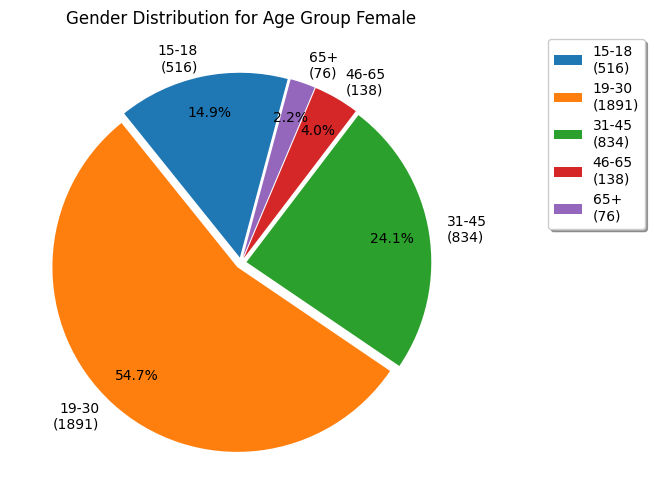

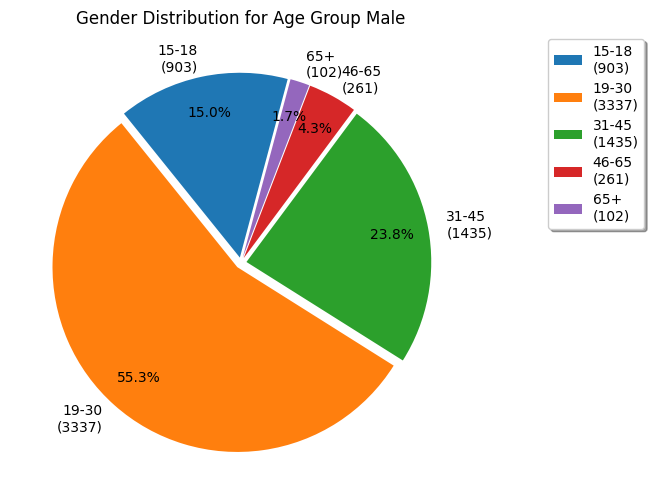

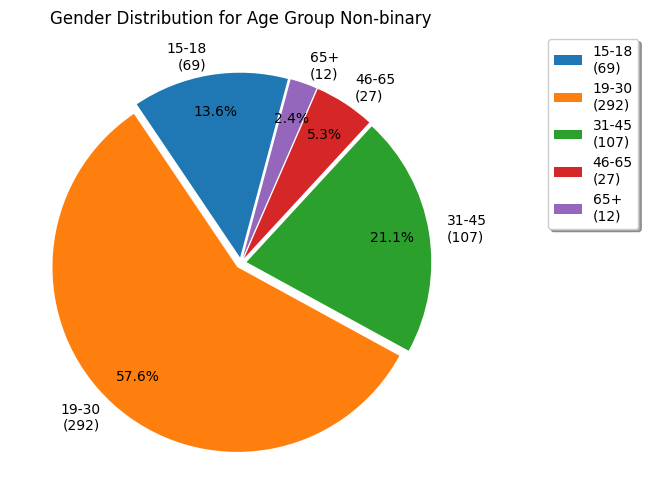

In [115]:
for age_group in age_df.columns:
    # Extract data for the current age group
    selected_age_group = age_df[age_group]

    # Extracting the counts (values) and labels (genders) for the pie chart
    pie_values = selected_age_group.values
    pie_labels = selected_age_group.index

    # Labels with counts
    labels_with_counts = [f'{label}\n({count})' for label, count in zip(pie_labels, pie_values)]

    # Create the pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(pie_values, labels=labels_with_counts, autopct='%1.1f%%', startangle=75,
            explode=[0.03] * len(pie_values), pctdistance=0.8)

    plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fancybox=True, shadow=True)
    plt.title(f'Gender Distribution for Age Group {age_group}')

    plt.show()


In [102]:
df.sample(2)

,Name,Age,Gender,City,Tier,Consume_frequency,Consume_time,Consume_reason,Heard_before,Tried_before,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
3616,Hazel Deshmukh,15-18,Male,Bangalore,Tier 1,Rarely,To stay awake during work/study,Increased energy and focus,No,Yes,...,More natural ingredients,Sugar,Yes,Yes,Online ads,Compact and portable cans,No,50-99,Gyms and fitness centers,Studying/working late
7429,Ishita Raval,15-18,Female,Mumbai,Tier 1,2-3 times a month,To stay awake during work/study,Increased energy and focus,Yes,No,...,Reduced sugar content,Vitamins,No,Yes,TV commercials,Innovative bottle design,No,Below 50,Supermarkets,Sports/exercise


In [103]:
city_count = df['City'].value_counts()

city_count

,count
City,
Bangalore,2828
Hyderabad,1833
Mumbai,1510
Chennai,937
Pune,906
Kolkata,566
Ahmedabad,456
Delhi,429
Jaipur,360


In [107]:
city_df = df.pivot_table(index='City', columns='Consume_frequency', aggfunc='size', fill_value=0)

city_df

Consume_frequency,2-3 times a month,2-3 times a week,Daily,Once a week,Rarely
City,,,,,
Ahmedabad,36,91,26,131,172
Bangalore,562,1432,302,272,260
Chennai,211,90,378,87,171
Delhi,84,62,163,42,78
Hyderabad,86,392,95,527,733
Jaipur,64,73,91,89,43
Kolkata,32,100,32,177,225
Lucknow,39,30,34,51,21
Mumbai,313,767,143,140,147


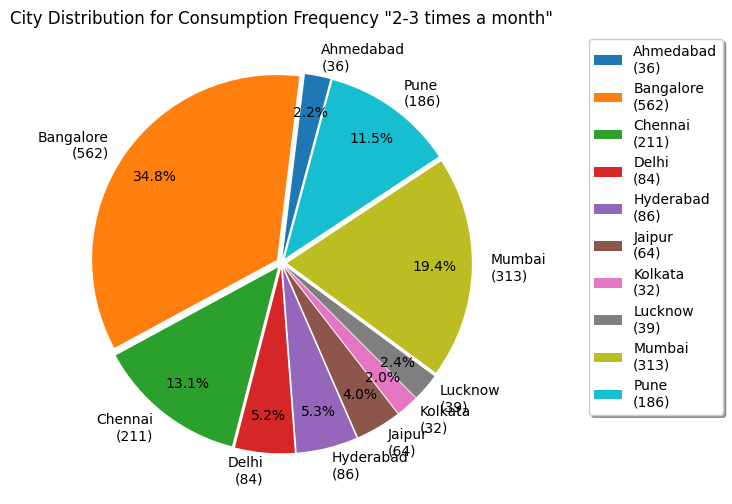

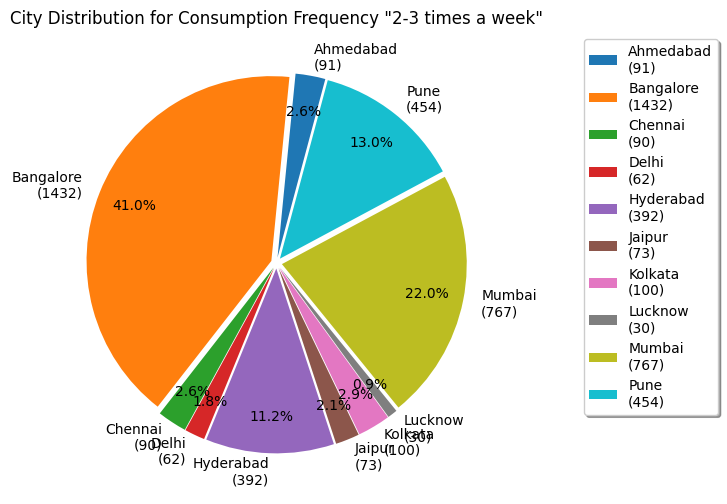

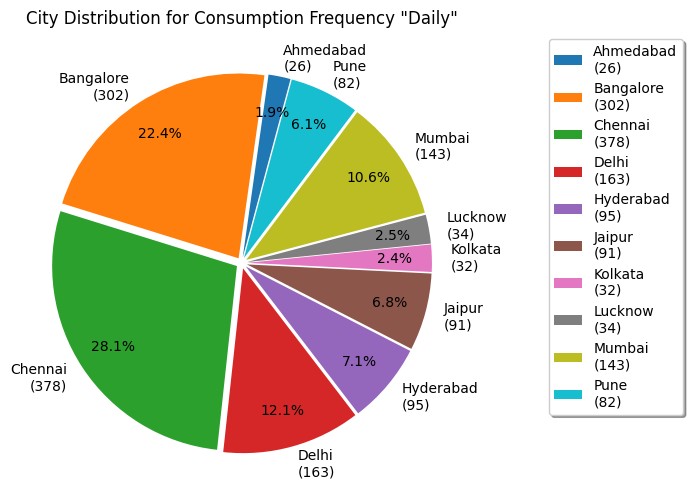

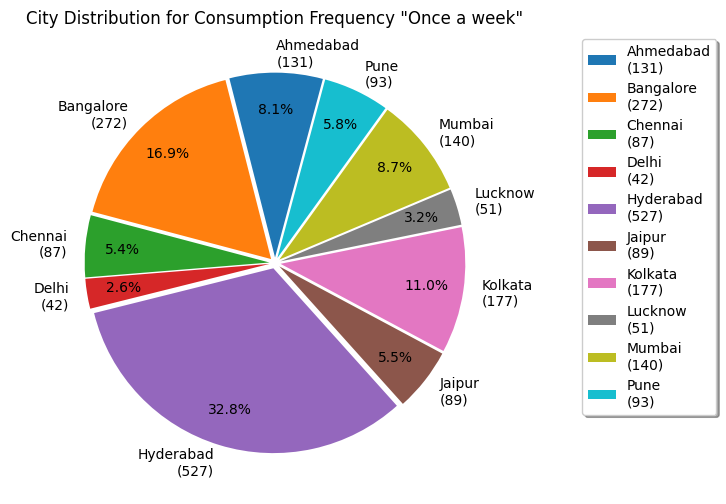

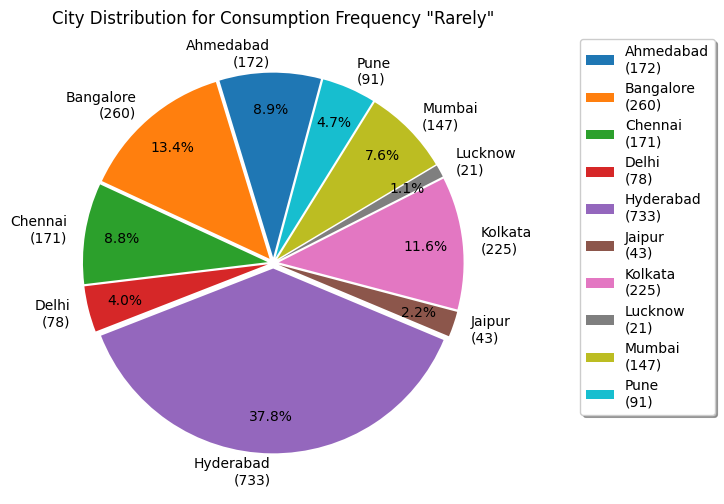

In [110]:
for frequency in city_df.columns:
    selected_frequency = city_df[frequency]

    pie_values = selected_frequency.values
    pie_labels = selected_frequency.index

    labels_with_counts = [f'{label}\n({count})' for label, count in zip(pie_labels, pie_values)]

    # Create the pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(pie_values, labels=labels_with_counts, autopct='%1.1f%%', startangle=75,
            explode=[0.03] * len(pie_values), pctdistance=0.8)

    plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fancybox=True, shadow=True)
    plt.title(f'City Distribution for Consumption Frequency "{frequency}"')

    plt.show()